# **HR ANALYTICS ON EMPLOYEE RETENTION AND ATTRITION**

**PART II: Decision Tree** <br>

Jam Flores<br>
Alex Gamboa<br>
Joey Tuason

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import itertools

from sklearn import metrics

In [ ]:
import warnings
warnings.filterwarnings("ignore")

## Import Dataset

In [ ]:
! gdown 1kaFmXdNuGQJPXi2iN6007xn7GCeapdhJ

Downloading...
From: https://drive.google.com/uc?id=1kaFmXdNuGQJPXi2iN6007xn7GCeapdhJ
To: /content/HR_comma_sep.csv
100% 567k/567k [00:00<00:00, 138MB/s]


In [ ]:
df = pd.read_csv("HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
df.Department = df['Departments ']
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


## Exploratory Data analysis

In [ ]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
df.isna().count()

satisfaction_level       14999
last_evaluation          14999
number_project           14999
average_montly_hours     14999
time_spend_company       14999
Work_accident            14999
left                     14999
promotion_last_5years    14999
Departments              14999
salary                   14999
dtype: int64

In [ ]:
#Counting unique values
print('Work Accident:',df.Work_accident.nunique())
print('Deparment: ',df.Department.nunique())
print('Salary: ',df.salary.nunique())

Work Accident: 2
Deparment:  10
Salary:  3


In [ ]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments ', 'salary'],
      dtype='object')

In [ ]:
df.insert(10,'Count',1)
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary,Count
0,0.38,0.53,2,157,3,0,1,0,sales,low,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,1
...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low,1
14995,0.37,0.48,2,160,3,0,1,0,support,low,1
14996,0.37,0.53,2,143,3,0,1,0,support,low,1
14997,0.11,0.96,6,280,4,0,1,0,support,low,1


In [ ]:
df_Dep = pd.pivot_table(df, values='Count', index=['left'],
                    columns=['Departments '], aggfunc=np.sum)
df_Dep.columns

Index(['IT', 'RandD', 'accounting', 'hr', 'management', 'marketing',
       'product_mng', 'sales', 'support', 'technical'],
      dtype='object', name='Departments ')

In [ ]:
df_Acc = pd.pivot_table(df, values='Count', index=['left'],
                    columns=['Work_accident'], aggfunc=np.sum)
df_Acc

Work_accident,0,1
left,,
0,9428,2000
1,3402,169


In [ ]:
df_sal = pd.pivot_table(df, values='Count', index=['left'],
                    columns=['salary'], aggfunc=np.sum)
df_sal

salary,high,low,medium
left,,,
0,1155,5144,5129
1,82,2172,1317


## Data Preprocessing

In [ ]:
#Converting Categorical Data to Numerical
inputs = df.drop(['left','Count'], axis='columns')
output = df['left']

In [ ]:
#labeling Categorical Values
from sklearn.preprocessing import LabelEncoder

In [ ]:
le_Dept = LabelEncoder()
le_sal = LabelEncoder()

In [ ]:
inputs['Departments '] = le_Dept.fit_transform(inputs['Departments '])
inputs['salary']= le_Dept.fit_transform(inputs['salary'])
inputs

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,0,7,1
1,0.80,0.86,5,262,6,0,0,7,2
2,0.11,0.88,7,272,4,0,0,7,2
3,0.72,0.87,5,223,5,0,0,7,1
4,0.37,0.52,2,159,3,0,0,7,1
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,8,1
14995,0.37,0.48,2,160,3,0,0,8,1
14996,0.37,0.53,2,143,3,0,0,8,1
14997,0.11,0.96,6,280,4,0,0,8,1


## Predictive Analytics

### Split Your Train set and Test set

In [ ]:
X = inputs.iloc[:,:].values
y = output.values

In [ ]:
print(X)
print(y)

[[0.38 0.53 2.   ... 0.   7.   1.  ]
 [0.8  0.86 5.   ... 0.   7.   2.  ]
 [0.11 0.88 7.   ... 0.   7.   2.  ]
 ...
 [0.37 0.53 2.   ... 0.   8.   1.  ]
 [0.11 0.96 6.   ... 0.   8.   1.  ]
 [0.37 0.52 2.   ... 0.   8.   1.  ]]
[1 1 1 ... 1 1 1]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [ ]:
print(X_train)
print(y_train)
print(X_test)
print(y_test)

[[0.75 0.81 5.   ... 0.   9.   2.  ]
 [0.13 0.91 2.   ... 0.   7.   2.  ]
 [0.67 0.74 3.   ... 0.   6.   1.  ]
 ...
 [0.69 0.94 5.   ... 0.   0.   2.  ]
 [0.78 0.59 5.   ... 0.   9.   0.  ]
 [0.56 0.68 5.   ... 0.   0.   1.  ]]
[1 0 0 ... 0 0 0]
[[0.44 0.57 2.   ... 0.   6.   2.  ]
 [0.55 0.96 3.   ... 0.   6.   2.  ]
 [0.72 0.67 5.   ... 0.   4.   2.  ]
 ...
 [0.37 0.54 2.   ... 0.   1.   2.  ]
 [0.52 0.61 4.   ... 0.   9.   1.  ]
 [0.13 0.65 4.   ... 0.   8.   2.  ]]
[1 0 0 ... 1 0 0]


### Feature Scaling

In [ ]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

In [ ]:
#print(X_train)
#print(X_test)

### Training Your Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion ='entropy',max_depth=4,random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

In [ ]:
classifier2 = DecisionTreeClassifier(criterion ='entropy',max_depth=4,random_state=0)
classifier2.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

### Predicting New Test Result

In [ ]:
inputs

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,0,7,1
1,0.80,0.86,5,262,6,0,0,7,2
2,0.11,0.88,7,272,4,0,0,7,2
3,0.72,0.87,5,223,5,0,0,7,1
4,0.37,0.52,2,159,3,0,0,7,1
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,8,1
14995,0.37,0.48,2,160,3,0,0,8,1
14996,0.37,0.53,2,143,3,0,0,8,1
14997,0.11,0.96,6,280,4,0,0,8,1


In [ ]:
y_pred = classifier.predict([[0.10,0.67,2,200,4,0,4,7,3]])
print(y_pred)

[1]


In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 ...
 [1 1]
 [0 0]
 [0 0]]


### Confusion Matrix and Accuracy

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
conf = confusion_matrix(y_test, y_pred)
print(conf)
accuracy_score(y_test, y_pred)

[[2257   42]
 [  51  650]]


0.969

Text(0.5, 15.0, 'Predicted label')

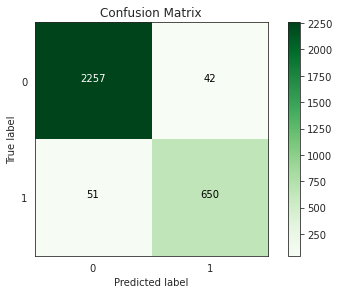

In [ ]:
classes = [0, 1]

# plot confusion matrix
sns.set_style('white')
plt.imshow(conf, interpolation='nearest', cmap=plt.cm.Greens)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = conf.max() / 2.
for i, j in itertools.product(range(conf.shape[0]), range(conf.shape[1])):
    plt.text(j, i, format(conf[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

### Visualizing your Results

In [ ]:
feature_names = [i for i  in inputs.columns]
y_train_str = df.left.astype('str')
y_train_str[y_train_str=='0']="Stay"
y_train_str[y_train_str=='1']="Leave"
y_train_str = y_train_str.values
y_train_str

array(['Leave', 'Leave', 'Leave', ..., 'Leave', 'Leave', 'Leave'],
      dtype=object)

In [ ]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import graphviz

In [ ]:
from sklearn import tree
dot_data=tree.export_graphviz(classifier2,out_file=None, feature_names=feature_names, class_names=['Stay','Leave'], filled=True,rounded= True, special_characters = True )

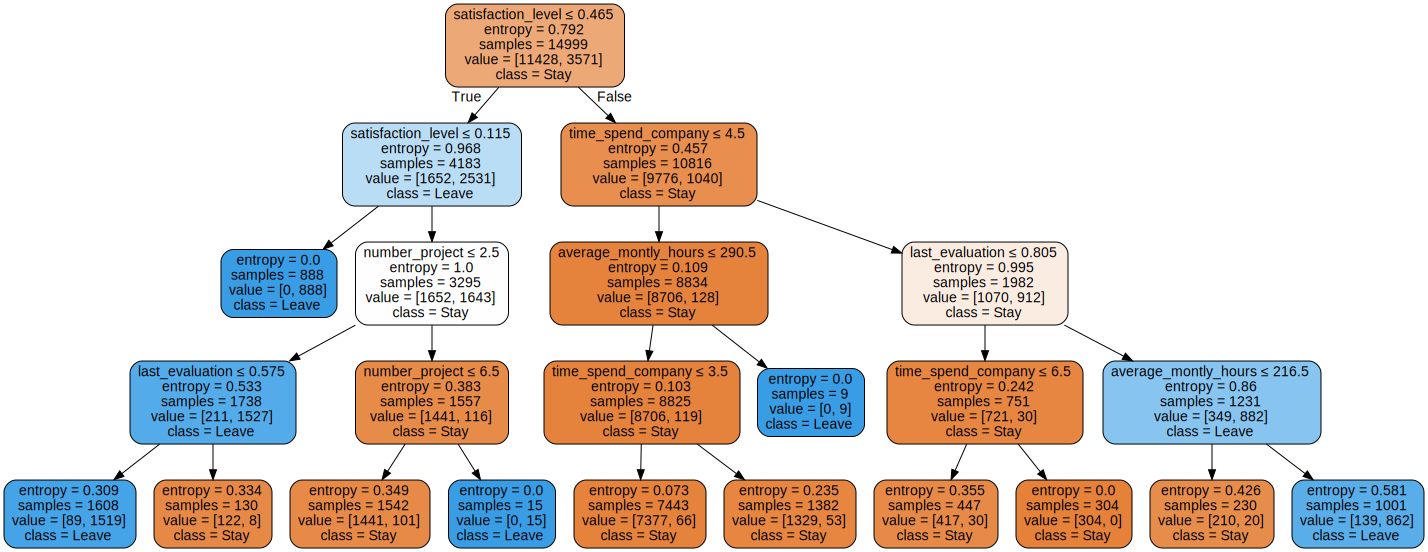

In [ ]:
graph = graphviz.Source(dot_data)
graph

### Looking for the Key Drivers

In [ ]:
df.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary,Count
0,0.38,0.53,2,157,3,0,1,0,sales,low,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,1


In [ ]:
#Use Catboost for Categorical Features
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.1 MB/s 


In [ ]:
import catboost
print('catboost version:', catboost.__version__)
from catboost import CatBoostClassifier 

catboost version: 1.0.6


In [ ]:
# map categorical features
features = [feat for feat in list(df) 
            if feat != 'left']
print(features)

categorical_features = np.where(df[features].dtypes != np.float)[0]
X_train, X_test, y_train, y_test = train_test_split(df[features], 
                                                    df[['left']], 
                                                    test_size=0.2, 
                                                     random_state=1)

params = {'iterations':5000,
        'learning_rate':0.01,
        'cat_features':categorical_features,
        'depth':3,
        'eval_metric':'AUC',
        'verbose':200,
        'od_type':"Iter", # overfit detector
        'od_wait':500, # most recent best iteration to wait before stopping
        'random_seed': 1
          }

cat_model = CatBoostClassifier(**params)
cat_model.fit(X_train, y_train,   
          eval_set=(X_test, y_test), 
          use_best_model=True, # True if we don't want to save trees created after iteration with the best validation score
          plot=True  
         );

['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'Departments ', 'salary', 'Count']


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.9590257	best: 0.9590257 (0)	total: 68.2ms	remaining: 5m 40s
200:	test: 0.9860235	best: 0.9860235 (200)	total: 3.1s	remaining: 1m 13s
400:	test: 0.9912611	best: 0.9912611 (400)	total: 5.46s	remaining: 1m 2s
600:	test: 0.9923839	best: 0.9923870 (599)	total: 9.47s	remaining: 1m 9s
800:	test: 0.9930769	best: 0.9930922 (796)	total: 14.7s	remaining: 1m 17s
1000:	test: 0.9935712	best: 0.9935743 (999)	total: 20.8s	remaining: 1m 23s
1200:	test: 0.9940201	best: 0.9940201 (1200)	total: 27s	remaining: 1m 25s
1400:	test: 0.9943065	best: 0.9943065 (1399)	total: 32.7s	remaining: 1m 24s
1600:	test: 0.9944935	best: 0.9945021 (1586)	total: 36.6s	remaining: 1m 17s
1800:	test: 0.9945861	best: 0.9945861 (1800)	total: 39.1s	remaining: 1m 9s
2000:	test: 0.9946886	best: 0.9946898 (1957)	total: 41.5s	remaining: 1m 2s
2200:	test: 0.9947137	best: 0.9947168 (2157)	total: 43.8s	remaining: 55.7s
2400:	test: 0.9947505	best: 0.9947536 (2394)	total: 46.4s	remaining: 50.2s
2600:	test: 0.9948284	best: 0.99483

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 564 kB 5.2 MB/s 


In [ ]:
import shap  # package used to calculate Shap values
# SHapley Additive exPlanations
# The goal of SHAP is to explain the prediction of an instance x by computing the contribution of each feature to the prediction. The SHAP explanation method computes Shapley values from coalitional game theory. The feature values of a data instance act as players in a coalition. Shapley values tell us how to fairly distribute the "payout" (= the prediction) among the features. 

from catboost import CatBoostClassifier, Pool
shap_values = cat_model.get_feature_importance(Pool(X_test, label=y_test,cat_features=categorical_features) ,
                                               type="ShapValues")
 
expected_value = shap_values[0,-1]
shap_values = shap_values[:,:-1]

shap.initjs()
shap.force_plot(expected_value, shap_values[0,:], X_test.iloc[0,:])

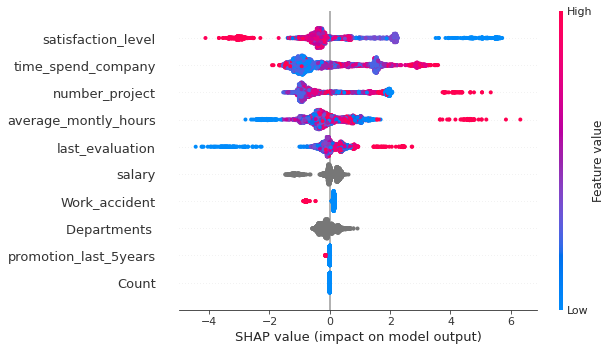

In [ ]:
shap.summary_plot(shap_values, X_test)

## Check For Overfitting (via Learning Curves)

In [ ]:
# log in accuracies for both train and test set
train_acc = []
test_acc = []

In [ ]:
# look at all possible depths of the tree

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

for depth in range(1,25):
  # setup model
  tree_model = tree.DecisionTreeClassifier(criterion ='entropy',max_depth=depth,random_state=0)
  tree_model.fit(X_train, y_train)

  # setup predictions
  train_pred = tree_model.predict(X_train)
  test_pred = tree_model.predict(X_test)

  # setup accuracies
  train_acc1 = metrics.accuracy_score(y_train, train_pred)
  test_acc1 = metrics.accuracy_score(y_test, test_pred)

  # consolidate (for the loop)
  #train_acc.append(train_acc)
  train_acc = np.append(train_acc, train_acc1)
  test_acc = np.append(test_acc, test_acc1)

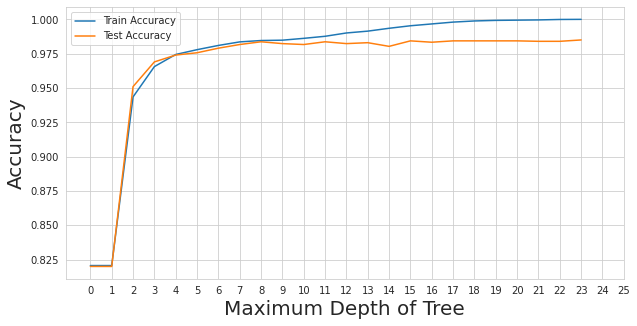

In [ ]:
# Learning Curves

plt.figure(figsize = (10, 5))
sns.set_style('whitegrid')
plt.plot(train_acc, 
         label='Train Accuracy')
plt.plot(test_acc, 
         label='Test Accuracy')
plt.legend(loc='upper left')
plt.xticks(range(0, 26, 1))
plt.xlabel('Maximum Depth of Tree', size = 20)
plt.ylabel('Accuracy', size = 20)

plt.show()

In [ ]:
# log in f1 for both train and test set
train_f1 = []
test_f1 = []

# look at all possible depths of the tree for F1 (unbalanced)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

for depth in range(1,25):
  # setup model
  tree_model = tree.DecisionTreeClassifier(criterion ='entropy',max_depth=depth,random_state=0)
  tree_model.fit(X_train, y_train)

  # setup predictions
  train_pred = tree_model.predict(X_train)
  test_pred = tree_model.predict(X_test)

  # setup accuracies
  train_f1_a = metrics.f1_score(y_train, train_pred)
  test_f1_a = metrics.f1_score(y_test, test_pred)

  # consolidate (for the loop)
  #train_acc.append(train_acc)
  train_f1 = np.append(train_f1, train_f1_a)
  test_f1 = np.append(test_f1, test_f1_a)

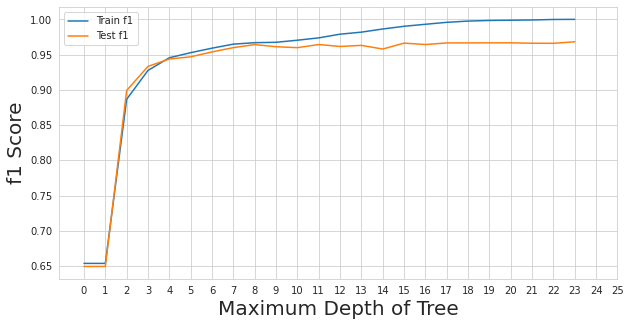

In [ ]:
# f1 Curves

plt.figure(figsize = (10, 5))
sns.set_style('whitegrid')
plt.plot(train_f1, 
         label='Train f1')
plt.plot(test_f1, 
         label='Test f1')
plt.legend(loc='upper left')
plt.xticks(range(0, 26, 1))
plt.xlabel('Maximum Depth of Tree', size = 20)
plt.ylabel('f1 Score', size = 20)

plt.show()